In [7]:
import os.path
from IPython.display import FileLink, FileLinks
from datetime import datetime
import time
start = time.time()
FileLinks('.')

input_path_movies = os.path.join('Films', 'movies.dat')
input_path_ratings = os.path.join('Films', 'ratings.dat.gz')

raw_data = sc.textFile(input_path_movies)
raw_ratings = sc.textFile(input_path_ratings)

header1 = raw_data.take(2)
header2 = raw_ratings.take(2)

genres = ["Animation","Children's", "Comedy", "Fantasy", "Romance", "Drama", "Crime",  "Thriller", "Action", 
          "Adventure", "Horror", "Sci-Fi", "Documentary", "Musical", "Mystery", "War", "Film-Noir", "Western"]
weekdays = range(0, 7)
years = []
ratings_count = []

#MovieID, Rating, Timestamp, Weekday, PersonID
ratings = []
raw_ratings = raw_ratings.collect()
for raw_rating in raw_ratings:
    rating = {}
    raw_rating = raw_rating.split('::')
    rating[0] = int(raw_rating[1])
    rating[1] = int(raw_rating[2])
    rating[2] = format_date(int(raw_rating[3]))
    rating[3] = get_day_of_week(rating[2])
    rating[4] = int(raw_rating[0])
    ratings.append(rating)
ratings = sorted(ratings, key=lambda k: k[0]) 

#MovieID, Movie, Year, [Genre], Avg Rating
movies = []
raw_data = raw_data.collect()
for raw_movie in raw_data:
#    if (time.time() - start) > 20:
#        break
    movie = {}
    raw_movie = raw_movie.split('::')
    movie[0] = int(raw_movie[0]) # Move movieId raw to clean
    movie[2] = raw_movie[1][len(raw_movie[1])-6:len(raw_movie[1])]
    movie[1] = raw_movie[1].split(" "+movie[2])[0]
    movie[2] = int(movie[2][1:5])
    movie[3] = raw_movie[2].split('|')
    movie[4] = calc_avg_rating(movie[0])
    if not (movie[2] in years):
        years.append(movie[2])
    movies.append(movie)
years.sort()

print 'Starting programm takes ', time.time() - start, 'seconds'

Starting programm takes  666.275571108 seconds


In [1]:
def calc_avg_rating(movieId):
    dic = []
    dic.append(movieId)
    total_rating = 0.0
    ratings_movie = list(filter(lambda d: d[0] in dic, ratings))
    if len(ratings_movie) == 0:
        return 0
    for rating in ratings_movie:
        total_rating += rating[1]
    return total_rating/len(ratings_movie)

In [2]:
def format_date(date):
    dic = datetime.fromtimestamp(date).strftime('%d/%m/%Y %H:%M:%S')
    date_object = datetime.strptime(dic, '%d/%m/%Y %H:%M:%S')
    return date_object

In [3]:
def get_day_of_week(date):
    return date.weekday()

In [4]:
def get_avg_rating(genre):
    total_rating = 0.0
    movies_genre = list(filter(lambda d: genre in d[3], movies))
    for movie in movies_genre:
        total_rating += movie[4]
    if len(movies_genre) == 0:
        return 0
    return total_rating/len(movies_genre)

In [5]:
def get_avg_year(year):
    dic = []    
    dic.append(year)
    
    total_rating = 0.0
    movies_year = list(filter(lambda d: d[2] in dic, movies))
    counter = len(movies_year)
    counter = counter * 10
    ratings_count.append(counter)
    for movie in movies_year:
        total_rating += movie[4]
        
    if len(movies_year) == 0:
        return 0
    return total_rating/len(movies_year)


In [6]:
def get_avg_weekday(weekday):
    dic = []
    dic.append(weekday)
    total_rating = 0.0
    ratings_weekday = list(filter(lambda d: d[3] in dic, ratings))
    for rating in ratings_weekday:
        total_rating += rating[1]
    if len(ratings_weekday) == 0:
        return 0
    return total_rating/len(ratings_weekday)

In [8]:
ratings_count = []
print ratings_count

[]


In [9]:
import operator
avg_rating_per_genre = {}
for genre in genres:
    avg_rating_per_genre[genre] = get_avg_rating(genre)
avg_rating_per_year_arr = []
avg_rating_per_year_dic = {}
for year in years:
    avg_rating_per_year_dic[year] = get_avg_year(year)
    avg_rating_per_year_arr.append(get_avg_year(year))
#print avg_rating_per_genre
avg_rating_per_year_dic = sorted(avg_rating_per_year_dic.items(), key=operator.itemgetter(1), reverse=True)
top_3_years = avg_rating_per_year_dic[:3]
#avg_rating_per_year = dict(avg_rating_per_year)
avg_rating_per_weekday = {}
for weekday in weekdays:
    avg_rating_per_weekday[weekday] = get_avg_weekday(weekday)
print top_3_years

[(1938, 4.0001954959215436), (1939, 3.806655871358228), (1921, 3.7666666666666666)]


<center><h3>The third best filmyear in history is <strong>1921</strong> with an average rating of <strong>3.77</strong></h3>
<h2>In second place finishes the year <strong>1939</strong> with an average rating of <strong>3.81</strong></h2>
<h1>The winner in the category 'Best filmyears ever' is <strong>1938</strong> with an average of <strong>4.00</strong></h1></center>

In [17]:
y1 = top_3_years[0][0]
r1 = top_3_years[0][1]
y2 = top_3_years[1][0]
r2 = top_3_years[1][1]
y3 = top_3_years[2][0]
r3 = top_3_years[2][1]


<center><h3>The third best filmyear in history is <strong>{{y1}}</strong> with an average rating of <strong>{{r1}}</strong></h3>
<h2>In second place finishes the year <strong>{{y2}}</strong> with an average rating of <strong>{{r2}}</strong></h2>
<h1>The winner in the category 'Best filmyears ever' is <strong>{{y3}}</strong> with an average of <strong>{{r3}}</strong></h1></center>


In [10]:
def get_name(movieId):
    start = time.time()
    dict = {}
    full_name = 'No record'
    for val in data:
        all_vals = val.split('::')
        if int(all_vals[0]) == movieId:
            dict[0] = all_vals[1]
            name = dict[0].split(' (', 1)
            full_name = name[0]  
            break
    print 'get_name method uses ', time.time() - start, 'seconds'
    return full_name

In [11]:
from IPython.display import HTML
form = """
<div style="background-color:gainsboro; border:solid black; width:300px; padding:20px;">
Pick your favourite color: <select id='color'>
                                <option value="blue">Blue</option>
                                <option value="lightblue">Lightblue</option>
                                <option value="red">Red</option>
                                <option value="yellow">Yellow</option>
                                <option value="cyan">Cyan</option>
                                <option value="magenta">Magenta</option>
                            </select>
<button onclick="set_color()">Set Color</button>
</div>
"""
javascript = """
<script type="text/Javascript">
    function set_color(){
        var var_name = "inp_color"
        var var_value = document.getElementById('color').value;
        var command = var_name + " = '" + var_value + "'";        
        var kernel = IPython.notebook.kernel;
        kernel.execute(command);
        alert(var_value)
    }
</script>
"""

HTML(form + javascript)

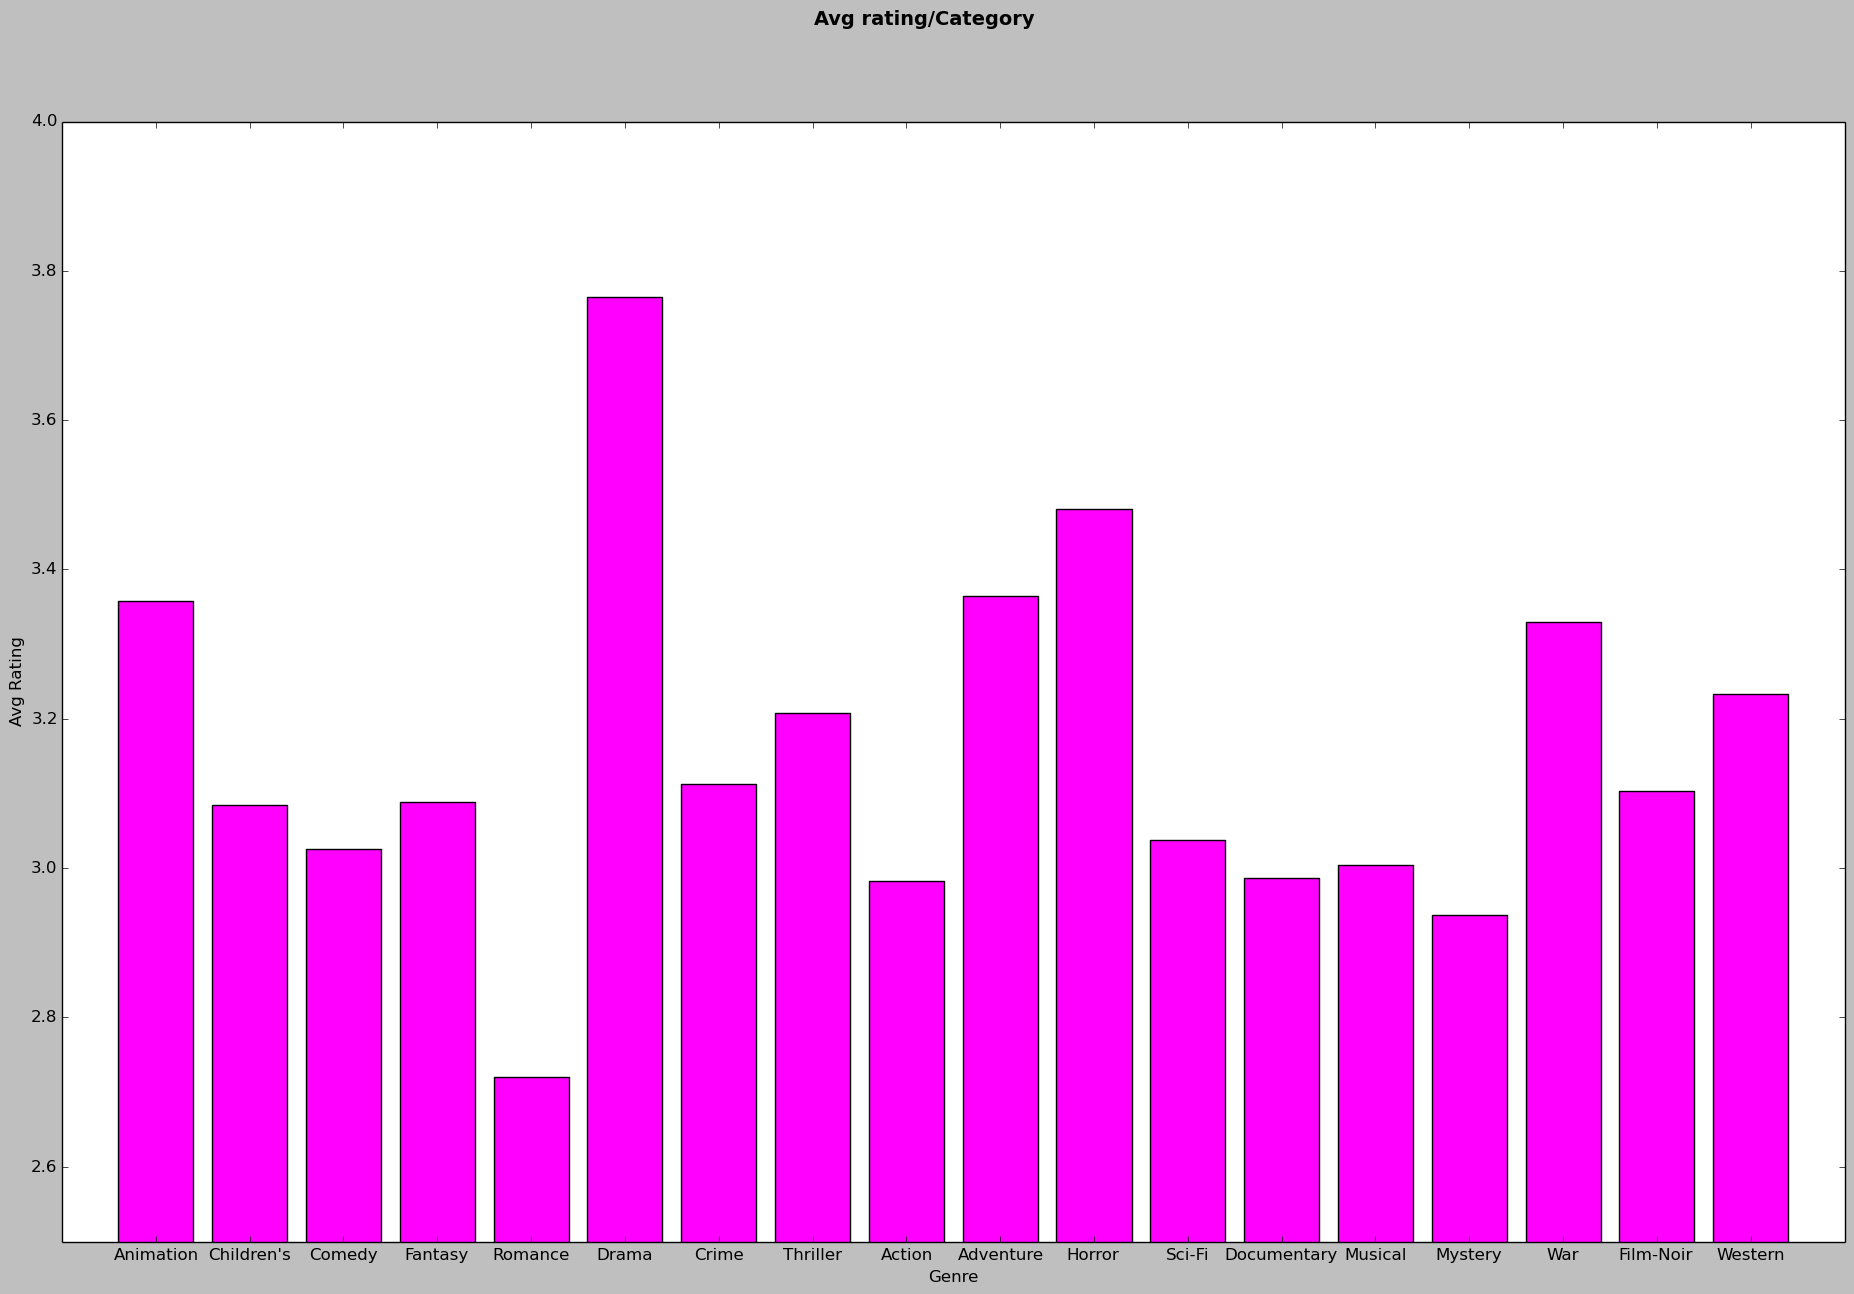

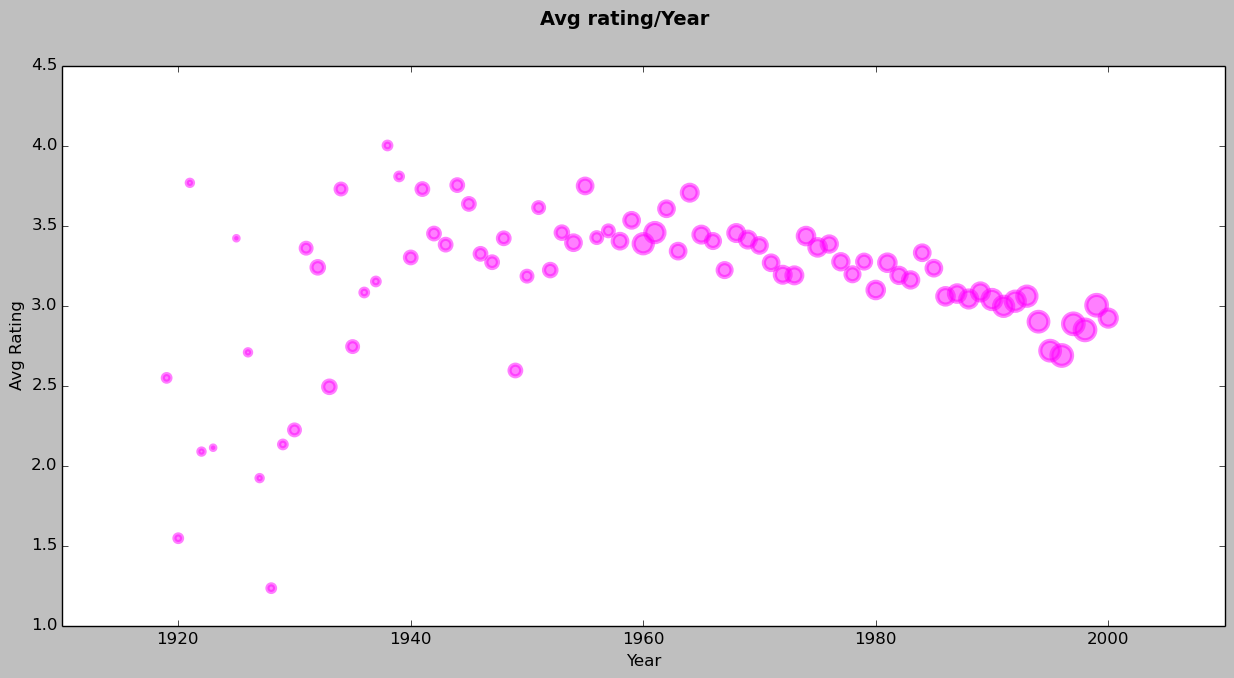

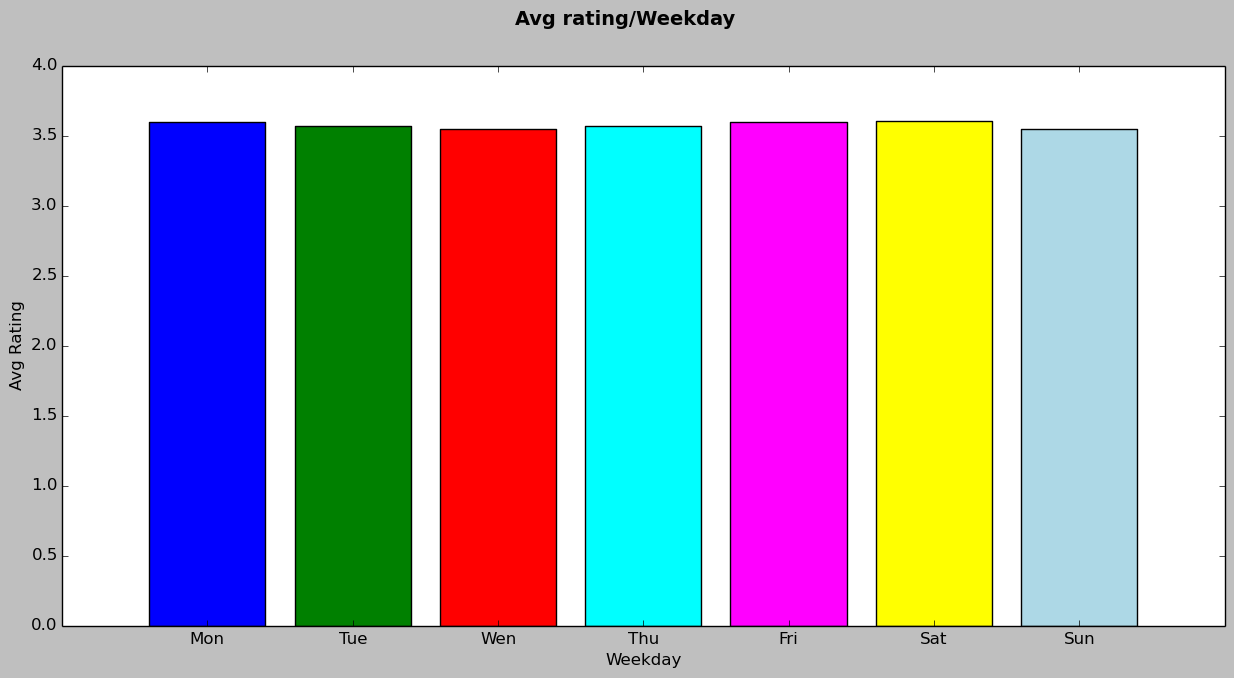

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


fig = plt.figure(figsize=(23,14))
x_axis = range(1, 19)
y_axis = avg_rating_per_genre.values()
fig.suptitle('Avg rating/Category', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Avg Rating')
plt.bar(x_axis, y_axis, color=inp_color, align='center')
plt.xlim(0,19)
plt.xticks(x_axis, genres)
plt.ylim(2.5,4)





fig2 = plt.figure(figsize=(15,7))
#ax = plt.axis([min(years), max(years), 0, 4])
vals = avg_rating_per_year_arr
fig2.suptitle('Avg rating/Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Avg Rating')
s = ratings_count
plt.ylim(1,4.5)
plt.scatter(years,vals, s = s, color = inp_color, alpha=0.5, linewidths=3)





fig3 = plt.figure(figsize=(15,7))
x_axis = range(1,8)
y_axis = avg_rating_per_weekday.values()
fig3.suptitle('Avg rating/Weekday', fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('Avg Rating')
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'lightblue']
plt.bar(x_axis, y_axis,color=colors, align='center')
my_xticks = ['Mon', 'Tue', 'Wen', 'Thu','Fri','Sat', 'Sun']
plt.xticks(x_axis, my_xticks)
#plt.ylim([3.5,3.62])




pass

In [67]:

from IPython.display import HTML

input_form = """
<div style="background-color:gainsboro; border:solid black; width:300px; padding:20px;">
Genre: <input type="text" id="var_value" placeholder="Insert Genre"><br>
<button onclick="set_value()">Choose Genre</button>
</div>
"""

javascript = """
<script type="text/Javascript">
    function set_value(){
        var var_name = "inp_genre"
        var var_value = document.getElementById('var_value').value;
        var command = var_name + " = '" + var_value + "'";        
        var kernel = IPython.notebook.kernel;
        kernel.execute(command);
    }
</script>
"""

HTML(input_form + javascript)


In [21]:
data = get_avg_rating(inp_genre)
print "The average rating of the '%s' genre is %r" % (inp_genre, data)

The average rating of the 'Animation' genre is 3.3643693511778485


<h3>-----------------------------------------------------------------------------------------------------------------------</h3>

In [ ]:
def get_year(movieId):
    start = time.time()
    dict = {}
    full_year = 'No record'
    for val in data:
        all_vals = val.split('::')
        if int(all_vals[0]) == movieId:
            dict[0] = all_vals[1]
            year = dict[0].split('(')
            full_year = year[1].split(')')
            full_year = full_year[0]
            break
            
    print 'get_year method uses ', time.time() - start, 'seconds'
    return full_year

In [ ]:
def get_genre(movieId):
    start = time.time()
    dict= {}
    all_genre = []
    for val in data:
        all_vals = val.split('::')
        if int(all_vals[0]) == movieId:
            dict[0] = all_vals[2]
            all_genre = dict[0].split('|')
            break
    print 'get_genre method uses ', time.time() - start, 'seconds'
    return all_genre

In [ ]:
from pyspark.mllib.regression import LabeledPoint
def make_data_dict(line):
    start = time.time()
    features = []
   
    raw_features = data[line-1].split('::')
    raw_ratings = ratings[line -1].split('::')


    lbl = int(raw_features[0])
    #FilmID
    features.append(lbl)        
    features.append(get_name(lbl))
    features.append(get_year(lbl))
    features.append(get_genre(lbl))
    #features.append(get_ratings(lbl))
    features.append(avg_rating(lbl))

    movie_features.append(features)
    print 'make_data_dict method uses ', time.time() - start, 'seconds'
    return features
make_data_dict(1)

In [ ]:
import numpy as np
z = np.count_nonzero(years)
print z

tlfgenre = ""

In [40]:
print inp_genre

Drama


In [83]:
print avg_rating_per_year_arr

[2.5476190476190474, 1.5454545454545454, 3.7666666666666666, 2.0869565217391304, 2.111111111111111, 3.4202769839379745, 2.7071991097414827, 1.9211881188118813, 1.2333333333333334, 2.1315789473684212, 2.222470238095238, 3.35825188295642, 3.2385566103558014, 2.491844388931981, 3.7280933415915265, 2.7432057951271616, 3.0813265366135223, 3.1501917863628104, 4.0001954959215436, 3.806655871358228, 3.3003219567907234, 3.7277044520451157, 3.4496906063067225, 3.380355386970416, 3.752452581342328, 3.634905130309585, 3.3229699617399864, 3.27056795759056, 3.4200116302318615, 2.5938665866908543, 3.1834298472797817, 3.612002101585984, 3.2213287159147126, 3.4552783250542554, 3.3924629981991874, 3.747261701365341, 3.4244113454975165, 3.4666325820739217, 3.4020291021768854, 3.5324048904403984, 3.3860690104782956, 3.455661679361651, 3.6045779445473842, 3.3398087990322525, 3.705059711483619, 3.442986868048498, 3.402898304639532, 3.221243617280914, 3.4528730689930827, 3.4119045346183645, 3.375573469437016